In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx
from sklearn import datasets

In [2]:
xl = pd.ExcelFile('data.xlsx')

# Data Cleaning

In [3]:
d1 = pd.read_excel(xl, 'Table 1')
d1.head()

,Unnamed: 0,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.6,NaN,SDG8.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human development index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,(index value),NaN,(years),NaN,(years),NaN,(years),NaN,(2011 PPP $),NaN,NaN,NaN,NaN


In [4]:
d1.drop([0,1,2],axis=0, inplace=True)

d1.columns = d1.loc[3]
d1.drop(3,axis=0,inplace=True)

d1.drop('HDI rank',axis=1,inplace=True)


new_names = d1.columns.values
new_names[0]='HDI Rank'
new_names[1]='Country'
d1.columns = new_names

d1.drop([4,5,6],axis = 0,inplace=True)

d1.dropna(axis=1, thresh=0,inplace=True)

new_names = d1.columns.values
new_names[5]='drop1'
new_names[7]='drop2'
d1.columns = new_names
d1.drop(['drop1','drop2'],axis=1,inplace =True)

d1.drop(d1.index[192:],inplace=True)

d1.dropna(subset=['HDI Rank'],inplace=True)
d1.dropna(subset=[7],axis=1,inplace=True)
d1.head()

,HDI Rank,Country,Human development index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
7,1,Norway,0.953688,82.271,18.0608,12.5668,68058.6,5
8,2,Switzerland,0.945936,83.63,16.2088,13.3808,59374.7,8
9,3,Ireland,0.942473,82.103,18.7933,12.5263,55659.7,9
10,4,Germany,0.938785,81.18,17.0964,14.1321,46945.9,15
11,4,"Hong Kong, China (SAR)",0.938809,84.687,16.5122,12.0381,60220.8,5


In [5]:
d1.tail()

,HDI Rank,Country,Human development index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
194,185,Burundi,0.422882,61.247,11.3046,3.12437,659.732,4
195,186,South Sudan,0.41277,57.604,5.00038,4.84913,1455.23,-7
196,187,Chad,0.401176,53.977,7.46536,2.4095,1715.57,-15
197,188,Central African Republic,0.380662,52.805,7.56836,4.282,776.676,0
198,189,Niger,0.376591,62.024,6.47145,2.02905,912.042,-3


In [6]:
d1.set_index('HDI Rank',inplace=True)
d1.head()

,Country,Human development index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
HDI Rank,,,,,,,
1,Norway,0.953688,82.271,18.0608,12.5668,68058.6,5
2,Switzerland,0.945936,83.63,16.2088,13.3808,59374.7,8
3,Ireland,0.942473,82.103,18.7933,12.5263,55659.7,9
4,Germany,0.938785,81.18,17.0964,14.1321,46945.9,15
4,"Hong Kong, China (SAR)",0.938809,84.687,16.5122,12.0381,60220.8,5


In [7]:
d2 = pd.read_excel(xl,'Table 3')
d2.head()

,Unnamed: 0,Table 3. Inequality-adjusted Human Development Index,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SDG10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Human Development Index (HDI),NaN,Inequality-adjusted HDI (IHDI),NaN,NaN,NaN,NaN,NaN,...,Inequality-adjusted income index,NaN,Income shares (%) held by,NaN,NaN,NaN,NaN,NaN,Gini Coefficient,NaN
2,HDI rank,Country,Value,NaN,Value,NaN,Overall loss (%),NaN,Difference from HDI rank,b,...,Value,NaN,Poorest 40 percent,NaN,Richest 10 percent,NaN,Richest 1%,NaN,(%),NaN
3,NaN,NaN,2018,NaN,2018,NaN,2018,NaN,2018,NaN,...,2018,NaN,2010-2017,e,2010-2017,e,2010-2016,e,2010-2017,e
4,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
new_names=d2.loc[1]
d2.columns = new_names
d2.drop([0,1],inplace=True)

d2.dropna(subset=[2], axis=1, inplace=True)

new_names = d2.columns.values
new_names[0]=d2.loc[2][0]
new_names[1]=d2.loc[2][1]
new_names[4]=d2.loc[2][4]
new_names[5]=d2.loc[2][5]
new_names[14]=d2.loc[2][14]
new_names[15]=d2.loc[2][15]
d2.columns = new_names
d2.head()

d2.dropna(subset=[5],axis=1,inplace=True)
d2.drop([2,3,4],inplace=True)

d2.drop(d2.index[192:],inplace=True)

d2.dropna(subset=['HDI rank'],inplace=True)
d2.set_index('HDI rank',inplace=True)

In [9]:
d2.head()

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Overall loss (%),Difference from HDI rank,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares (%) held by,Richest 10 percent,Richest 1%,Gini Coefficient
HDI rank,,,,,,,,,,,,,,,
1,Norway,0.953688,0.888768,6.80726,0,3,0.929275,4.38463,0.878604,12.7336,0.859861,23.1,22.3,8.37,27.5
2,Switzerland,0.945936,0.881521,6.80965,-1,3.5,0.944661,1.93114,0.878964,14.4826,0.824995,20.3,25.2,11.93,32.3
3,Ireland,0.942473,0.865262,8.19242,-6,3.4,0.922946,3.54746,0.884994,16.949,0.793096,20.9,25.4,12.8,31.8
4,Germany,0.938785,0.860676,8.32023,-7,3.8,0.905464,2.7227,0.920215,17.6556,0.76517,20.7,24.8,11.13,31.7
4,"Hong Kong, China (SAR)",0.938809,0.8153,13.156,-17,2.5,0.970305,9.75463,0.77606,25.5627,0.719695,..,..,..,..


In [10]:
d2.tail()

,Country,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Overall loss (%),Difference from HDI rank,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares (%) held by,Richest 10 percent,Richest 1%,Gini Coefficient
HDI rank,,,,,,,,,,,,,,,
185,Burundi,0.422882,0.29576,30.0608,5,28.5,0.453717,39.4882,0.253038,20.9293,0.225345,17.9,31,..,38.6
186,South Sudan,0.41277,0.263879,36.0712,-1,36.2,0.369098,39.5525,0.181667,32.253,0.27403,12.5,33.2,..,46.3
187,Chad,0.401176,0.249797,37.7339,-1,40.9,0.308929,42.9501,0.164126,28.4,0.307415,14.6,32.4,..,43.3
188,Central African Republic,0.380662,0.222308,41.5995,-1,40.1,0.302311,34.5496,0.231017,49.1946,0.157315,10.3,46.2,..,56.2
189,Niger,0.376591,0.2717,27.8529,3,30.9,0.446747,34.9648,0.160895,16.4339,0.279036,19.6,27,..,34.3


In [11]:
len(d2)

189

In [12]:
d3 = pd.read_excel(xl,'Table 5')
d3.head()

,Unnamed: 0,Table 5. Gender Inequality Index,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,SDG3.1,NaN,SDG3.7,NaN,SDG5.5,NaN,SDG4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Gender Inequality Index,NaN,NaN,NaN,Maternal mortality ratio,NaN,Adolescent birth rate,NaN,Share of seats in parliament,NaN,Population with at least some secondary education,NaN,NaN,NaN,Labour force participation rate,NaN,NaN,a
3,NaN,NaN,Value,NaN,Rank,NaN,"(deaths per 100,000 live births)",NaN,"(births per 1,000 women ages 15–19)",NaN,(% held by women),NaN,(% ages 25 and older),NaN,NaN,NaN,(% ages 15 and older),NaN,NaN,NaN
4,HDI rank,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,Male,NaN,Female,NaN,Male,NaN


In [13]:
d3.columns = d3.loc[2]
d3.drop([0,1,2,3],inplace=True)

new_names=d3.columns.values
new_names[0]=d3.loc[4][0]
new_names[1]=d3.loc[4][1]
new_names[12]='Population with at least some secondary education-Female'
new_names[14]='Population with at least some secondary education-Male'
new_names[16]='Labour force participation rate-Female'
new_names[18]='Labour force participation rate-Male'
d3.columns= new_names
d3.drop([4,5,6],inplace=True)

d3.dropna(subset=[7],axis=1,inplace=True)


new_names = d3.columns.values
new_names[3] = 'GII rank'
d3.drop(d3.index[192:],inplace=True)
d3.dropna(subset=['HDI rank'],inplace=True)
d3.columns = new_names
d3.set_index('HDI rank',inplace=True)
d3.head()

,Country,Gender Inequality Index,GII rank,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education-Female,Population with at least some secondary education-Male,Labour force participation rate-Female,Labour force participation rate-Male
HDI rank,,,,,,,,,,
1,Norway,0.0441164,5,5,5.141,41.4201,96.0667,94.8103,60.2,66.7
2,Switzerland,0.0367187,1,5,2.763,29.2683,96.3714,97.1626,62.6,74.1
3,Ireland,0.0929025,22,8,7.515,24.3119,90.238,86.308,55.1,68.1
4,Germany,0.0835379,19,6,8.095,31.491,95.9948,96.6405,55.3,66.2
4,"Hong Kong, China (SAR)",..,..,..,2.705,..,76.5853,82.9151,54.1,67.8


In [14]:
len(d3)

189

In [15]:
d4=pd.read_excel(xl,'Table 7')
d4.head()

,Unnamed: 0,Table 7. Population trends,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Dependency ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Total,NaN,NaN,NaN,Average annual growth,NaN,NaN,NaN,...,Median age,NaN,(per 100 people ages 15–64),NaN,NaN,NaN,Total fertility rate,NaN,NaN,NaN
3,HDI rank,Country,(millions),NaN,NaN,NaN,(%),NaN,NaN,NaN,...,(years),NaN,Young age (0–14),NaN,Old age (65 and older),NaN,(births per woman),NaN,NaN,NaN
4,NaN,NaN,2018,NaN,2030.0,b,2005/2010,NaN,2015/2020,NaN,...,2020,NaN,2018,NaN,2018,NaN,2005/2010,NaN,2015/2020,NaN


In [16]:
new_names = d4.loc[2].values
new_names[0]='HDI rank'
new_names[1]='Country'
new_names[2]='Population'
new_names[20]='Dependency ratio-Young age (0–14)'
new_names[22]='Dependency ratio-Old age (65-)'
new_names[26]='Total fertility rate'
d4.drop([0,1,2,3,4],inplace=True)

new_names[6]='Average annual growth-old'
new_names[8]='Average annual growth'
d4.columns=new_names

d4.dropna(subset=[7],axis=1,inplace=True)
d4.drop(5,inplace=True)

new_names=d4.columns.values
new_names[3]='2030'
d4.drop('2030',axis=1,inplace=True)

d4.drop(d4.index[192:],inplace=True)
new_names=d4.columns.values
new_names[12]='Old fertility rate'
d4.columns=new_names
d4.drop(['Average annual growth-old', 'Old fertility rate'],axis=1,inplace=True)

d4.tail()

,HDI rank,Country,Population,Average annual growth,Urban,Under age 5,Ages 15–64,Ages 65 and older,Median age,Dependency ratio-Young age (0–14),Dependency ratio-Old age (65-),Total fertility rate
193,185,Burundi,11.1754,3.146,13,1.98355,5.83929,0.251104,17.32,87.082,4.3,5.45
194,186,South Sudan,10.9759,0.873,19.6,1.70248,6.01277,0.373015,19.04,76.34,6.204,4.7359
195,187,Chad,15.4777,3.038,23.1,2.81475,7.79972,0.383928,16.554,93.517,4.922,5.7973
196,188,Central African Republic,4.66637,1.445,41.4,0.727432,2.46757,0.131861,17.611,83.764,5.344,4.7541
197,189,Niger,22.4428,3.816,16.4,4.50339,10.6425,0.582393,15.151,105.406,5.472,6.95


In [17]:
d4.dropna(subset=['HDI rank'],inplace=True)
d4.set_index('HDI rank',inplace=True)
d4.head()

,Country,Population,Average annual growth,Urban,Under age 5,Ages 15–64,Ages 65 and older,Median age,Dependency ratio-Young age (0–14),Dependency ratio-Old age (65-),Total fertility rate
HDI rank,,,,,,,,,,,
1,Norway,5.33796,0.834,82.2,0.300869,3.49112,0.910081,39.836,26.833,26.068,1.68
2,Switzerland,8.52561,0.845,73.8,0.444356,5.66662,1.58774,43.053,22.434,28.019,1.535
3,Ireland,4.81869,1.191,63.2,0.328993,3.11903,0.66815,38.246,33.071,21.422,1.8409
4,Germany,83.1244,0.482,77.3,3.86887,53.9619,17.8401,45.744,20.982,33.061,1.586
4,"Hong Kong, China (SAR)",7.37173,0.847,100,0.31973,5.25045,1.24398,44.79,16.709,23.693,1.3262


In [18]:
len(d4)

189

In [19]:
d5=pd.read_excel(xl,'Table 8')
d5.head()

,Unnamed: 0,Table 8. Health outcomes,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,NaN,NaN,NaN,NaN,SDG3.b,NaN,SDG3.b,NaN,SDG2.2,NaN,...,SDG3.3,NaN,NaN,NaN,SDG3.c,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Infants exclusively breastfed,NaN,Infants lacking immunization,NaN,NaN,NaN,Child malnutrition,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,DPT,NaN,Measles,NaN,Stunting (moderate or severe),NaN,...,"HIV prevalence, adult",NaN,Healthy life expectancy at birth,NaN,Current health expenditure,NaN,NaN,NaN,NaN,NaN
4,HDI rank,Country,(% ages 0–5 months),NaN,(% of one-year-olds),NaN,NaN,NaN,(% under age 5),NaN,...,(% ages 15–49),NaN,(years),NaN,(% of GDP),NaN,NaN,NaN,NaN,NaN


In [20]:
d5.columns = d5.loc[2]
d5.drop([0,1,2,3],inplace=True)

d5.dropna(subset=[67],axis=1,inplace=True)

new_names=d5.columns.values
new_names[0]='HDI rank'
new_names[1]='Country'
new_names[3]='Infants lacking immunization-DPT'
new_names[4]='Infants lacking immunization-Measles'
new_names[6]='Mortality rate-Infant'
new_names[7]='Mortality rate-Under five'
new_names[8]='Mortality rate-Female'
new_names[9]='Mortality rate-Male'
new_names[10]='Mortality rates attributed to noncommunicable diseases-Female'
new_names[11]='Mortality rates attributed to noncommunicable diseases-Male'
new_names[12]='Incidence-Malaria'
new_names[13]='Incidence-Tuberculosis'
new_names[14]='HIV prevalence, adult'
new_names[15]='Healthy life expectancy at birth'
new_names[16]='Current health expenditure'
d5.columns = new_names

d5.drop([4,5,6],inplace=True)


In [21]:
d5.drop(d5.index[192:],inplace=True)

d5.dropna(subset=['HDI rank'],inplace=True)

new_names=d5.columns.values
new_names[0]='HDI rank'
d5.columns=new_names

d5.set_index('HDI rank',inplace=True)
d5.head()

,Country,Infants exclusively breastfed,Infants lacking immunization-DPT,Infants lacking immunization-Measles,Child malnutrition,Mortality rate-Infant,Mortality rate-Under five,Mortality rate-Female,Mortality rate-Male,Mortality rates attributed to noncommunicable diseases-Female,Mortality rates attributed to noncommunicable diseases-Male,Incidence-Malaria,Incidence-Tuberculosis,"HIV prevalence, adult",Healthy life expectancy at birth,Current health expenditure
HDI rank,,,,,,,,,,,,,,,,
1,Norway,..,1,4,..,2.1,2.6,43.49,69.462,261.9,365.4,..,5.1,0.1,70.2,10.5006
2,Switzerland,..,3,4,..,3.7,4.2,35.896,58.204,237,343.2,..,7.2,..,72,12.2476
3,Ireland,..,2,8,..,3,3.5,47.106,80.92,299.7,404.9,..,7.3,0.2,70.4,7.3783
4,Germany,..,2,3,..,3.1,3.7,50.173,92.46,295.9,445.5,..,7.5,0.2,69.5,11.1392
4,"Hong Kong, China (SAR)",..,..,..,..,..,..,35.037,65.849,..,..,..,67,..,..,..


In [22]:
d5.tail()

,Country,Infants exclusively breastfed,Infants lacking immunization-DPT,Infants lacking immunization-Measles,Child malnutrition,Mortality rate-Infant,Mortality rate-Under five,Mortality rate-Female,Mortality rate-Male,Mortality rates attributed to noncommunicable diseases-Female,Mortality rates attributed to noncommunicable diseases-Male,Incidence-Malaria,Incidence-Tuberculosis,"HIV prevalence, adult",Healthy life expectancy at birth,Current health expenditure
HDI rank,,,,,,,,,,,,,,,,
185,Burundi,82.3261,6,12,55.9472,42.5,61.2,257.341,314.753,625,708.7,194.497,114,1.1,53.8,6.19156
186,South Sudan,44.5377,42,49,31.2826,62.5,96.4,304.015,328.964,540.7,589.3,141.678,146,2.4,50.6,..
187,Chad,0.106022,45,63,39.7691,73.4,123.2,335.375,380.094,710.9,796.7,188.608,154,1.3,51.5,4.5381
188,Central African Republic,32.9845,31,51,39.6203,87.6,121.5,364.478,401.556,638.1,680.3,387.318,423,4,44.8,4.28252
189,Niger,23.2532,9,23,40.5551,48.3,84.5,226.833,255.179,648.3,681.8,358.647,90,0.3,54.2,6.22894


In [23]:
d6 = pd.read_excel(xl, 'Table 9')
d6.head()

,Unnamed: 0,Table 9. Education achievements,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,SDG4.6,NaN,SDG4.6,NaN,NaN,NaN,SDG4.6,NaN,...,SDG4.1,NaN,SDG4.3,NaN,NaN,NaN,NaN,NaN,SDG1.a,NaN
2,NaN,NaN,Literacy rate,NaN,NaN,NaN,NaN,NaN,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Adult (% ages ...,NaN,Youth\n(% ages 15–24),NaN,NaN,NaN,Population with at least some secondary education,NaN,...,Secondary,NaN,Tertiary,NaN,Primary school dropout rate,NaN,Survival rate to the last grade of lower secon...,NaN,Government expenditure on education,NaN
4,HDI rank,Country,NaN,NaN,Female,NaN,Male,NaN,(% ages 25 and older),NaN,...,(% of secondary school–age population),NaN,(% of tertiary school–age population),NaN,(% of primary school cohort),NaN,(%),NaN,(% of GDP),NaN


In [24]:
d6.columns = d6.loc[3]
d6.drop([0,1,2,3,4],inplace=True)

d6.dropna(subset=[d6.index[25]],axis=1,inplace=True)

d6.drop([5,6],inplace=True)
new_names=d6.columns.values
new_names[0]='HDI rank'
new_names[1]='Country'
new_names[2]='drop1'
new_names[3]='drop2'
new_names[4]='drop3'
d6.columns=new_names
d6.drop(['drop1','drop2','drop3'],axis=1,inplace=True)

d6.drop(d6.index[192:],inplace=True)
d6.dropna(subset=['HDI rank'],inplace=True)
d6.set_index('HDI rank',inplace=True)
d6.head()

,Country,Population with at least some secondary education,Pre-primary,Primary,Secondary,Tertiary,Primary school dropout rate,Survival rate to the last grade of lower secondary general education,Government expenditure on education
HDI rank,,,,,,,,,
1,Norway,95.4411,95.4446,100.23,116.842,81.9689,0.8978,98.7565,7.55247
2,Switzerland,96.4954,104.787,104.407,102.29,57.8661,0.63992,98.7674,5.1243
3,Ireland,88.2834,116,101.341,117.029,77.5571,..,99.4038,3.76971
4,Germany,96.3096,108.46,102.984,101.91,68.3275,3.51825,54.3487,4.81341
4,"Hong Kong, China (SAR)",79.4002,107.128,106.806,104.442,73.7586,1.15538,99.011,3.30965


In [25]:
d6.tail()

,Country,Population with at least some secondary education,Pre-primary,Primary,Secondary,Tertiary,Primary school dropout rate,Survival rate to the last grade of lower secondary general education,Government expenditure on education
HDI rank,,,,,,,,,
185,Burundi,9.28,14.1527,126.152,50.3283,6.16473,56.7732,71.9224,4.34407
186,South Sudan,33.1695,10.3382,66.5893,9.88386,..,..,..,0.98115
187,Chad,6.02587,0.97121,88.0968,22.6831,3.44048,71.4406,57.1313,2.85071
188,Central African Republic,22.08,2.97716,105.668,17.5462,..,53.4437,39.9355,..
189,Niger,6.62,7.98617,75.1047,24.5984,4.01831,35.6045,47.1233,3.54273


In [26]:
d7 = pd.read_excel(xl,'Table 10')
d7.head()

,Unnamed: 0,Table 10. National income and composition of resources,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,SDG8.1,NaN,SDG10.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SDG17.4,NaN,NaN,NaN
2,NaN,NaN,Gross domestic product (GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Debts,NaN,NaN,NaN,Prices,NaN
3,NaN,NaN,Total,NaN,Per capita,NaN,NaN,NaN,"Labour share of GDP, comprising wages and soci...",NaN,...,Total tax revenue,NaN,"Taxes on income, profits and capital gains",NaN,Domestic credit provided by financial sector,NaN,Total debt service,NaN,Consumer price index,NaN
4,HDI rank,Country,(2011 PPP $ billions),NaN,(2011 PPP $),NaN,Annual growth (%),NaN,(%),NaN,...,(% of GDP),NaN,(% of total tax revenue),NaN,(% of GDP),NaN,(% of GNI),NaN,(2010=100),NaN


In [27]:
d7.columns = d7.loc[3]
d7.drop([0,1,2,3],inplace=True)

d7.dropna(subset=[4],axis=1,inplace=True)

new_names=d7.columns.values
new_names[0]='HDI rank'
new_names[1]='Country'
new_names[2]='Total GDP'
new_names[3]='GDP per capita'
new_names[4]='drop1'
new_names[8]='drop2'
d7.columns=new_names
d7.drop([4,5,6],inplace=True)
d7.drop(['drop1','drop2'],axis=1,inplace=True)

d7.drop(d7.index[192:],inplace=True)
d7.dropna(subset=['HDI rank'],inplace=True)
d7.set_index('HDI rank',inplace=True)
d7.head()

,Country,Total GDP,GDP per capita,"Labour share of GDP, comprising wages and social protection transfers",Gross fixed capital formation,General government final consumption expenditure,Total tax revenue,"Taxes on income, profits and capital gains",Domestic credit provided by financial sector,Total debt service,Consumer price index
HDI rank,,,,,,,,,,,
1,Norway,347.778,65441.4,49.3,24.132,23.5261,22.4783,22.258,147.56,..,117.718
2,Switzerland,502.64,59019.2,64.5,24.5219,11.8415,10.4934,25.2378,179.325,..,99.1869
3,Ireland,341.498,70361,34.3,24.9485,11.9034,18.5743,40.8992,73.4897,..,105.593
4,Germany,3811.31,45959.4,56.9,20.7743,19.5278,11.3566,17.8166,125.884,..,111.247
4,"Hong Kong, China (SAR)",427.11,57322.5,..,21.4708,9.86874,..,..,251.986,..,130.844


In [28]:
d7.tail()

,Country,Total GDP,GDP per capita,"Labour share of GDP, comprising wages and social protection transfers",Gross fixed capital formation,General government final consumption expenditure,Total tax revenue,"Taxes on income, profits and capital gains",Domestic credit provided by financial sector,Total debt service,Consumer price index
HDI rank,,,,,,,,,,,
185,Burundi,7.37872,660.266,..,9.35824,23.476,13.4878,14.5293,42.9601,1.13795,183.372
186,South Sudan,18.177,1678,..,1.5331,38.3275,..,..,46.4772,..,4583.71
187,Chad,27.0316,1746.48,..,20.929,4.32522,..,..,22.4806,1.59765,115.906
188,Central African Republic,3.61499,774.688,..,10.7989,7.22047,6.93594,6.27181,28.0553,1.12295,186.862
189,Niger,20.9165,931.988,..,33.6639,15.8207,..,..,21.9762,2.55662,112.115


In [29]:
d8=pd.read_excel(xl,'Table 11')
d8.head()

,Unnamed: 0,Table 11. Work and employment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,SDG9.2,NaN,SDG9.2,NaN,...,SDG8.7,NaN,SDG1.1,NaN,SDG8.3,NaN,NaN,NaN,SDG1.3,NaN
2,NaN,NaN,Employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Work that is a risk to human development,NaN,NaN,NaN,NaN,NaN,Skill-level employment,NaN,Employment-related social security,NaN
3,NaN,NaN,Employment to population ratio,a,Labour force participation rate,a,Employment in agriculture,a,Employment in services,a,...,Child labour,NaN,Working poor at PPP$3.20 a day,a,Proportion of informal employment in nonagricu...,NaN,High-skill to low-skill ratio,NaN,Old-age pension recipients,b
4,HDI rank,Country,(% ages 15 and older),NaN,NaN,NaN,(% of total employment),NaN,NaN,NaN,...,(% ages 5-17),NaN,(% of total employment),NaN,(% of total employment in nonagriculture),NaN,(employment ratio),NaN,(% of statutory pension age population),NaN


In [30]:
d8.columns=d8.loc[3]

d8.drop([0,1,2,3,4,5],inplace=True)

d8.dropna(subset=[7],axis=1,inplace=True)

d8.drop(6,inplace=True)
new_names=d8.columns.values
new_names[0]='HDI rank'
new_names[1]='Country'
d8.columns=new_names
d8.drop(d8.index[192:],inplace=True)
d8.dropna(subset=['HDI rank'],inplace=True)
d8.set_index('HDI rank',inplace=True)
d8.tail()

,Country,Employment to population ratio,Labour force participation rate,Employment in agriculture,Employment in services,Total,Youth,Youth not in school or employment,Child labour,Working poor at PPP$3.20 a day,Proportion of informal employment in nonagricultural employment,High-skill to low-skill ratio,Old-age pension recipients
HDI rank,,,,,,,,,,,,,
185,Burundi,77.8,79,92,6,1.5,2.9,6.19,30.9217,89.6,89.4,5.3125,4
186,South Sudan,63.8,73,49.6,35,12.7,19.6,..,..,..,..,..,..
187,Chad,69.7,71.3,81.6,15.3,2.2,4,..,38.95,64.2,..,..,..
188,Central African Republic,67.4,72.1,72.8,18,6.5,11.5,..,30.4591,85.9,..,..,..
189,Niger,78.5,78.7,75.9,16,0.3,0.4,25.2,34.3954,73,86.4,..,5.8


In [31]:
d8.head()

,Country,Employment to population ratio,Labour force participation rate,Employment in agriculture,Employment in services,Total,Youth,Youth not in school or employment,Child labour,Working poor at PPP$3.20 a day,Proportion of informal employment in nonagricultural employment,High-skill to low-skill ratio,Old-age pension recipients
HDI rank,,,,,,,,,,,,,
1,Norway,61,63.5,2,78.7,3.9,9.7,4.85,..,..,..,14.4433,98.8
2,Switzerland,64.9,68.3,3.1,76.6,4.9,7.9,6.04,..,..,..,12.9742,99.7
3,Ireland,58,61.5,5,76.5,5.7,13.5,10.07,..,..,..,5.18519,71.3
4,Germany,58.5,60.6,1.3,71.6,3.4,6.4,5.9,..,..,..,5.79174,100
4,"Hong Kong, China (SAR)",58.6,60.3,0.2,88,2.8,8,6.1,..,0.1,..,1.92699,..


In [32]:
d9=pd.read_excel(xl,'Table 12')
d9.head()

,Unnamed: 0,Table 12. Human security,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,SDG16.9,NaN,"SDG1.5,11.5",NaN,"SDG1.5,11.5",NaN,"SDG1.5,11.5,13.1",NaN,...,SDG3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SDG2.1,NaN
2,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,...,Suicide rate,NaN,NaN,NaN,Justification of wife beating,NaN,NaN,NaN,Depth of food deficit,NaN
3,NaN,NaN,Birth registration,NaN,Refugees by country of origin,NaN,Internally displaced persons,NaN,Homeless people due to natural disaster,NaN,...,"(per 100,000 people)",NaN,NaN,NaN,(% ages 15-49),NaN,NaN,NaN,Average dietary energy supply adequacy,NaN
4,HDI rank,Country,(% under age 5),NaN,(thousands),NaN,(thousands),NaN,(average annual per million people),NaN,...,Female,NaN,Male,NaN,Female,NaN,Male,NaN,(%),NaN


In [33]:
d9.columns=d9.loc[3]
d9.drop([0,1,2,3,4,5,6],inplace=True)

d9.dropna(subset=[7],axis=1,inplace=True)


new_names=d9.columns.values
new_names[0]='HDI rank'
new_names[1]='Country'
new_names[3]='drop1'
new_names[11]='Suicide rate-Female'
new_names[12]='Suicide rate-Male'
new_names[13]='Justification of wife beating-Female'
new_names[14]='Justification of wife beating-Male'
d9.columns=new_names

d9.drop('drop1',axis=1,inplace=True)
d9.drop(d9.index[192:],inplace=True)
d9.dropna(subset=['HDI rank'],inplace=True)
d9.set_index('HDI rank',inplace=True)
d9.tail()

,Country,Birth registration,Refugees by country of origin,Internally displaced persons,Homeless people due to natural disaster,Number of deaths and missing persons attributed to disasters,Orphaned children,Prison population,Homicide rate,Suicide rate-Female,Suicide rate-Male,Justification of wife beating-Female,Justification of wife beating-Male,Average dietary energy supply adequacy
HDI rank,,,,,,,,,,,,,,
185,Burundi,83.5,387.862,49,167.68,2.025,630,93,6,7.7,23.1,72.9,44.3,..
186,South Sudan,35.4,2285.26,1869,0,2.371,620,55,13.9,4.1,8.3,78.5,..,..
187,Chad,12,10.898,90,83.9315,..,970,57,..,13.8,17.1,73.5,50.5,98
188,Central African Republic,61,590.874,641,397.487,..,350,17,19.8,6,18,79.6,75.2,81
189,Niger,63.9,2.725,156,184.298,2.071,1030,43,4.4,6.7,11.5,59.6,26.8,124


In [34]:
d9.head()

,Country,Birth registration,Refugees by country of origin,Internally displaced persons,Homeless people due to natural disaster,Number of deaths and missing persons attributed to disasters,Orphaned children,Prison population,Homicide rate,Suicide rate-Female,Suicide rate-Male,Justification of wife beating-Female,Justification of wife beating-Male,Average dietary energy supply adequacy
HDI rank,,,,,,,,,,,,,,
1,Norway,100,0.009,..,0,4.354,..,64,0.5,6.5,13.6,..,..,135
2,Switzerland,100,0.007,..,0,3.496,..,77,0.5,6.9,15.8,..,..,131
3,Ireland,100,0.004,..,0,0.062,34,78,0.9,4.2,17.6,..,..,147
4,Germany,100,0.071,..,0,..,490,77,1,4.8,13.6,..,..,139
4,"Hong Kong, China (SAR)",..,0.013,..,0,..,..,113,0.3,..,..,..,..,134


In [35]:
d10=pd.read_excel(xl,'Table 13')
d10.head()

,Unnamed: 0,Table 13. Human and capital mobility,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG 17.3,NaN,NaN,NaN,SDG 17.2,NaN,...,SDG 8.9,NaN,"SDG 17.6, 17.8",NaN,NaN,NaN,SDG 9.c,NaN,NaN,NaN
2,NaN,NaN,Trade,NaN,Financial flows,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Internet users,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Exports and imports,NaN,"Foreign direct investment, net inflows",NaN,Private capital flows\n,NaN,Net official development assistance received,NaN,...,International inbound tourists,NaN,Total,NaN,Female,NaN,Mobile phone subscriptions,NaN,NaN,NaN


In [36]:
d10.columns=d10.loc[4]
d10.drop([0,1,2,3,4,5,6],inplace=True)

d10.drop(7,inplace=True)
d10.dropna(subset=[9],axis=1,inplace=True)

new_names=d10.columns.values
new_names[0]='HDI rank'
new_names[1]='Country'
new_names[14]='drop1'
d10.columns=new_names
d10.drop('drop1',axis=1,inplace=True)
d10.drop(d10.index[192:],inplace=True)
d10.dropna(subset=['HDI rank'],inplace=True)
d10.set_index('HDI rank',inplace=True)
d10.tail()

,Country,Exports and imports,"Foreign direct investment, net inflows",Private capital flows\n,Net official development assistance received,"Remittances, inflows",Net migration rate,Stock of immigrants,International student mobility,International inbound tourists,Total,Female,Mobile phone subscriptions
HDI rank,,,,,,,,,,,,,
185,Burundi,23.0562,0.0099758,-5.1028,13.5247,1.17014,0.181,2.75738,-1.58933,299,2.66075,1.5,56.5347
186,South Sudan,114,-0.255627,..,60.5187,35.2667,-15.902,6.7212,..,..,7.97743,..,33.463
187,Chad,73.6839,3.35813,..,6.58021,..,0.131,3.28651,-16.1074,87,6.5,..,45.1237
188,Central African Republic,46.0572,0.792587,..,23.3739,..,-8.581,1.9054,3.99297,120.5,4.33925,..,27.6743
189,Niger,49.5875,4.16116,-3.48997,15.1932,3.05308,0.181,1.37638,-2.27786,164,5.25049,2.9,40.6385


In [37]:
d10.head()

,Country,Exports and imports,"Foreign direct investment, net inflows",Private capital flows\n,Net official development assistance received,"Remittances, inflows",Net migration rate,Stock of immigrants,International student mobility,International inbound tourists,Total,Female,Mobile phone subscriptions
HDI rank,,,,,,,,,,,,,
1,Norway,70.5977,-4.58586,11.4156,..,0.148833,5.273,15.0591,-2.85386,6252,96.4917,97,107.174
2,Switzerland,118.832,-9.59278,17.822,..,0.350539,6.135,29.5705,13.1249,9889,89.6861,88.5,129.609
3,Ireland,209.811,5.67574,17.9346,..,0.165907,4.923,16.9384,1.49718,10338,84.5223,85.7,103.171
4,Germany,87.1581,2.63407,4.69422,..,0.451186,6.569,14.8148,4.12368,37452,89.7391,84.2,129.324
4,"Hong Kong, China (SAR)",375.99,23.8194,12.264,..,0.117,3.992,39.1459,-0.95174,27884,89.4159,88,259.426


In [38]:
data = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
for x in data:
    x.set_index('Country',inplace=True)

In [39]:
d1.head()

,Human development index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
Country,,,,,,
Norway,0.953688,82.271,18.0608,12.5668,68058.6,5
Switzerland,0.945936,83.63,16.2088,13.3808,59374.7,8
Ireland,0.942473,82.103,18.7933,12.5263,55659.7,9
Germany,0.938785,81.18,17.0964,14.1321,46945.9,15
"Hong Kong, China (SAR)",0.938809,84.687,16.5122,12.0381,60220.8,5


In [40]:
d1.drop(['Human development index (HDI) ','GNI per capita rank minus HDI rank'],axis=1,inplace=True)

In [41]:
d2.head()

,Human Development Index (HDI),Inequality-adjusted HDI (IHDI),Overall loss (%),Difference from HDI rank,Inequality in life expectancy,Inequality-adjusted life expectancy index,Inequality in education,Inequality-adjusted education index,Inequality in income,Inequality-adjusted income index,Income shares (%) held by,Richest 10 percent,Richest 1%,Gini Coefficient
Country,,,,,,,,,,,,,,
Norway,0.953688,0.888768,6.80726,0,3,0.929275,4.38463,0.878604,12.7336,0.859861,23.1,22.3,8.37,27.5
Switzerland,0.945936,0.881521,6.80965,-1,3.5,0.944661,1.93114,0.878964,14.4826,0.824995,20.3,25.2,11.93,32.3
Ireland,0.942473,0.865262,8.19242,-6,3.4,0.922946,3.54746,0.884994,16.949,0.793096,20.9,25.4,12.8,31.8
Germany,0.938785,0.860676,8.32023,-7,3.8,0.905464,2.7227,0.920215,17.6556,0.76517,20.7,24.8,11.13,31.7
"Hong Kong, China (SAR)",0.938809,0.8153,13.156,-17,2.5,0.970305,9.75463,0.77606,25.5627,0.719695,..,..,..,..


In [42]:
d2.drop(['Human Development Index (HDI)', 'Inequality-adjusted HDI (IHDI)','Overall loss (%)', 'Difference from HDI rank',
 'Inequality-adjusted life expectancy index','Inequality-adjusted income index','Income shares (%) held by', 'Richest 10 percent', ' Richest 1%','Inequality-adjusted education index'],axis=1,inplace=True)

In [43]:
d3.head()

,Gender Inequality Index,GII rank,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education-Female,Population with at least some secondary education-Male,Labour force participation rate-Female,Labour force participation rate-Male
Country,,,,,,,,,
Norway,0.0441164,5,5,5.141,41.4201,96.0667,94.8103,60.2,66.7
Switzerland,0.0367187,1,5,2.763,29.2683,96.3714,97.1626,62.6,74.1
Ireland,0.0929025,22,8,7.515,24.3119,90.238,86.308,55.1,68.1
Germany,0.0835379,19,6,8.095,31.491,95.9948,96.6405,55.3,66.2
"Hong Kong, China (SAR)",..,..,..,2.705,..,76.5853,82.9151,54.1,67.8


In [44]:
d3.drop(['Gender Inequality Index', 'GII rank', 'Maternal mortality ratio',
 'Population with at least some secondary education-Female',
 'Population with at least some secondary education-Male',
 'Labour force participation rate-Female','Labour force participation rate-Male'],axis=1,inplace=True)

In [45]:
d4.head()

,Population,Average annual growth,Urban,Under age 5,Ages 15–64,Ages 65 and older,Median age,Dependency ratio-Young age (0–14),Dependency ratio-Old age (65-),Total fertility rate
Country,,,,,,,,,,
Norway,5.33796,0.834,82.2,0.300869,3.49112,0.910081,39.836,26.833,26.068,1.68
Switzerland,8.52561,0.845,73.8,0.444356,5.66662,1.58774,43.053,22.434,28.019,1.535
Ireland,4.81869,1.191,63.2,0.328993,3.11903,0.66815,38.246,33.071,21.422,1.8409
Germany,83.1244,0.482,77.3,3.86887,53.9619,17.8401,45.744,20.982,33.061,1.586
"Hong Kong, China (SAR)",7.37173,0.847,100,0.31973,5.25045,1.24398,44.79,16.709,23.693,1.3262


In [46]:
d4['Dependency ratio'] = d4['Dependency ratio-Old age (65-)']+d4['Dependency ratio-Young age (0–14)']

In [47]:
d4.drop(['Average annual growth','Under age 5',
       'Ages 15–64', 'Ages 65 and older','Dependency ratio-Young age (0–14)',
       'Dependency ratio-Old age (65-)'],axis=1,inplace=True)

In [48]:
d5.head()

,Infants exclusively breastfed,Infants lacking immunization-DPT,Infants lacking immunization-Measles,Child malnutrition,Mortality rate-Infant,Mortality rate-Under five,Mortality rate-Female,Mortality rate-Male,Mortality rates attributed to noncommunicable diseases-Female,Mortality rates attributed to noncommunicable diseases-Male,Incidence-Malaria,Incidence-Tuberculosis,"HIV prevalence, adult",Healthy life expectancy at birth,Current health expenditure
Country,,,,,,,,,,,,,,,
Norway,..,1,4,..,2.1,2.6,43.49,69.462,261.9,365.4,..,5.1,0.1,70.2,10.5006
Switzerland,..,3,4,..,3.7,4.2,35.896,58.204,237,343.2,..,7.2,..,72,12.2476
Ireland,..,2,8,..,3,3.5,47.106,80.92,299.7,404.9,..,7.3,0.2,70.4,7.3783
Germany,..,2,3,..,3.1,3.7,50.173,92.46,295.9,445.5,..,7.5,0.2,69.5,11.1392
"Hong Kong, China (SAR)",..,..,..,..,..,..,35.037,65.849,..,..,..,67,..,..,..


In [49]:
d5.drop(['Infants exclusively breastfed',
       'Infants lacking immunization-DPT',
       'Infants lacking immunization-Measles','Mortality rate-Infant', 'Mortality rates attributed to noncommunicable diseases-Female',
       'Mortality rates attributed to noncommunicable diseases-Male','Incidence-Malaria',
       'Incidence-Tuberculosis','Mortality rate-Female', 'Mortality rate-Male',
       'Child malnutrition','HIV prevalence, adult'],axis=1,inplace=True)

In [50]:
d6.head()

,Population with at least some secondary education,Pre-primary,Primary,Secondary,Tertiary,Primary school dropout rate,Survival rate to the last grade of lower secondary general education,Government expenditure on education
Country,,,,,,,,
Norway,95.4411,95.4446,100.23,116.842,81.9689,0.8978,98.7565,7.55247
Switzerland,96.4954,104.787,104.407,102.29,57.8661,0.63992,98.7674,5.1243
Ireland,88.2834,116,101.341,117.029,77.5571,..,99.4038,3.76971
Germany,96.3096,108.46,102.984,101.91,68.3275,3.51825,54.3487,4.81341
"Hong Kong, China (SAR)",79.4002,107.128,106.806,104.442,73.7586,1.15538,99.011,3.30965


In [51]:
d6.drop(['Pre-primary','Primary', ' Secondary', 'Tertiary', 'Primary school dropout rate',
       'Survival rate to the last grade of lower secondary general education'],axis=1,inplace=True)

In [52]:
d7.head()

,Total GDP,GDP per capita,"Labour share of GDP, comprising wages and social protection transfers",Gross fixed capital formation,General government final consumption expenditure,Total tax revenue,"Taxes on income, profits and capital gains",Domestic credit provided by financial sector,Total debt service,Consumer price index
Country,,,,,,,,,,
Norway,347.778,65441.4,49.3,24.132,23.5261,22.4783,22.258,147.56,..,117.718
Switzerland,502.64,59019.2,64.5,24.5219,11.8415,10.4934,25.2378,179.325,..,99.1869
Ireland,341.498,70361,34.3,24.9485,11.9034,18.5743,40.8992,73.4897,..,105.593
Germany,3811.31,45959.4,56.9,20.7743,19.5278,11.3566,17.8166,125.884,..,111.247
"Hong Kong, China (SAR)",427.11,57322.5,..,21.4708,9.86874,..,..,251.986,..,130.844


In [53]:
d7.drop(['Labour share of GDP, comprising wages and social protection transfers',
       'Gross fixed capital formation',
       ' General government final consumption expenditure',
       'Total tax revenue', 'Taxes on income, profits and capital gains',
       'Domestic credit provided by financial sector',
       'Total debt service'],axis=1,inplace=True)

In [54]:
d8.head()

,Employment to population ratio,Labour force participation rate,Employment in agriculture,Employment in services,Total,Youth,Youth not in school or employment,Child labour,Working poor at PPP$3.20 a day,Proportion of informal employment in nonagricultural employment,High-skill to low-skill ratio,Old-age pension recipients
Country,,,,,,,,,,,,
Norway,61,63.5,2,78.7,3.9,9.7,4.85,..,..,..,14.4433,98.8
Switzerland,64.9,68.3,3.1,76.6,4.9,7.9,6.04,..,..,..,12.9742,99.7
Ireland,58,61.5,5,76.5,5.7,13.5,10.07,..,..,..,5.18519,71.3
Germany,58.5,60.6,1.3,71.6,3.4,6.4,5.9,..,..,..,5.79174,100
"Hong Kong, China (SAR)",58.6,60.3,0.2,88,2.8,8,6.1,..,0.1,..,1.92699,..


In [55]:
d8.drop(['Employment to population ratio','Employment in agriculture ','Employment in services ', 
         'Youth','Youth not in school or employment', 'Child labour','Working poor at PPP$3.20 a day',
         'Proportion of informal employment in nonagricultural employment','Old-age pension recipients'],axis=1,inplace=True)

In [56]:
new_names=d8.columns.values
new_names[1]='Total unemploymnet(% of labour force)'
d8.columns=new_names

In [57]:
d9.head()

,Birth registration,Refugees by country of origin,Internally displaced persons,Homeless people due to natural disaster,Number of deaths and missing persons attributed to disasters,Orphaned children,Prison population,Homicide rate,Suicide rate-Female,Suicide rate-Male,Justification of wife beating-Female,Justification of wife beating-Male,Average dietary energy supply adequacy
Country,,,,,,,,,,,,,
Norway,100,0.009,..,0,4.354,..,64,0.5,6.5,13.6,..,..,135
Switzerland,100,0.007,..,0,3.496,..,77,0.5,6.9,15.8,..,..,131
Ireland,100,0.004,..,0,0.062,34,78,0.9,4.2,17.6,..,..,147
Germany,100,0.071,..,0,..,490,77,1,4.8,13.6,..,..,139
"Hong Kong, China (SAR)",..,0.013,..,0,..,..,113,0.3,..,..,..,..,134


In [58]:
d9.drop(['Birth registration', 'Internally displaced persons','Homeless people due to natural disaster',
       'Number of deaths and missing persons attributed to disasters','Orphaned children', 
       'Suicide rate-Female', 'Suicide rate-Male','Justification of wife beating-Female',
       'Justification of wife beating-Male','Average dietary energy supply adequacy'],axis=1, inplace=True)

In [59]:
d10.head()

,Exports and imports,"Foreign direct investment, net inflows",Private capital flows\n,Net official development assistance received,"Remittances, inflows",Net migration rate,Stock of immigrants,International student mobility,International inbound tourists,Total,Female,Mobile phone subscriptions
Country,,,,,,,,,,,,
Norway,70.5977,-4.58586,11.4156,..,0.148833,5.273,15.0591,-2.85386,6252,96.4917,97,107.174
Switzerland,118.832,-9.59278,17.822,..,0.350539,6.135,29.5705,13.1249,9889,89.6861,88.5,129.609
Ireland,209.811,5.67574,17.9346,..,0.165907,4.923,16.9384,1.49718,10338,84.5223,85.7,103.171
Germany,87.1581,2.63407,4.69422,..,0.451186,6.569,14.8148,4.12368,37452,89.7391,84.2,129.324
"Hong Kong, China (SAR)",375.99,23.8194,12.264,..,0.117,3.992,39.1459,-0.95174,27884,89.4159,88,259.426


In [60]:
d10.columns.values

array(['Exports and imports', 'Foreign direct investment, net inflows',
       'Private capital flows\n ',
       'Net official development assistance received',
       'Remittances, inflows', 'Net migration rate',
       'Stock of immigrants ', 'International student mobility',
       'International inbound tourists', 'Total', 'Female',
       'Mobile phone subscriptions'], dtype=object)

In [61]:
d10.drop(['Private capital flows\n ',
       'Net official development assistance received',
       'Remittances, inflows', 'Net migration rate',
       'Stock of immigrants ','Total', 'Female',
       'Mobile phone subscriptions'],axis=1,inplace=True)

# Data analysis

In [62]:
final = pd.concat(data,axis=1)

In [63]:
final.head()

,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Inequality in life expectancy,Inequality in education,Inequality in income,Gini Coefficient,Adolescent birth rate,Share of seats in parliament,...,Labour force participation rate,Total unemploymnet(% of labour force),High-skill to low-skill ratio,Refugees by country of origin,Prison population,Homicide rate,Exports and imports,"Foreign direct investment, net inflows",International student mobility,International inbound tourists
Country,,,,,,,,,,,,,,,,,,,,,
Norway,82.271,18.0608,12.5668,68058.6,3,4.38463,12.7336,27.5,5.141,41.4201,...,63.5,3.9,14.4433,0.009,64,0.5,70.5977,-4.58586,-2.85386,6252
Switzerland,83.63,16.2088,13.3808,59374.7,3.5,1.93114,14.4826,32.3,2.763,29.2683,...,68.3,4.9,12.9742,0.007,77,0.5,118.832,-9.59278,13.1249,9889
Ireland,82.103,18.7933,12.5263,55659.7,3.4,3.54746,16.949,31.8,7.515,24.3119,...,61.5,5.7,5.18519,0.004,78,0.9,209.811,5.67574,1.49718,10338
Germany,81.18,17.0964,14.1321,46945.9,3.8,2.7227,17.6556,31.7,8.095,31.491,...,60.6,3.4,5.79174,0.071,77,1,87.1581,2.63407,4.12368,37452
"Hong Kong, China (SAR)",84.687,16.5122,12.0381,60220.8,2.5,9.75463,25.5627,..,2.705,..,...,60.3,2.8,1.92699,0.013,113,0.3,375.99,23.8194,-0.95174,27884


In [64]:
final.columns.values

array(['Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling',
       'Gross national income (GNI) per capita',
       'Inequality in life expectancy', 'Inequality in education',
       'Inequality in income', 'Gini Coefficient',
       'Adolescent birth rate', 'Share of seats in parliament',
       'Population', ' Urban', 'Median age', 'Total fertility rate',
       'Dependency ratio', 'Mortality rate-Under five',
       'Healthy life expectancy at birth', 'Current health expenditure',
       'Population with at least some secondary education',
       'Government expenditure on education', 'Total GDP',
       'GDP per capita', 'Consumer price index',
       'Labour force participation rate',
       'Total unemploymnet(% of labour force)',
       'High-skill to low-skill ratio', 'Refugees by country of origin ',
       'Prison population', 'Homicide rate', 'Exports and imports',
       'Foreign direct investment, net inflows',
       'International 

In [65]:
ex1 = final.drop(['Healthy life expectancy at birth', 'GDP per capita', 
                  'Total fertility rate', 'Inequality in life expectancy',
                  'Inequality in education', 'Inequality in income', 
                  'Adolescent birth rate', 'Foreign direct investment, net inflows', 
                  'International student mobility', 'International inbound tourists', 
                  'Share of seats in parliament','Total unemploymnet(% of labour force)', 
                  'Refugees by country of origin ','Mortality rate-Under five',
                  'GDP per capita','Exports and imports','Population',' Urban' ],axis=1)

In [66]:
ex1.replace('..',value=None,method='ffill',inplace=True)
ex1.head()

,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Gini Coefficient,Median age,Dependency ratio,Current health expenditure,Population with at least some secondary education,Government expenditure on education,Total GDP,Consumer price index,Labour force participation rate,High-skill to low-skill ratio,Prison population,Homicide rate
Country,,,,,,,,,,,,,,,,
Norway,82.271,18.0608,12.5668,68058.6,27.5,39.836,52.901,10.5006,95.4411,7.55247,347.778,117.718,63.5,14.4433,64,0.5
Switzerland,83.63,16.2088,13.3808,59374.7,32.3,43.053,50.453,12.2476,96.4954,5.1243,502.64,99.1869,68.3,12.9742,77,0.5
Ireland,82.103,18.7933,12.5263,55659.7,31.8,38.246,54.493,7.3783,88.2834,3.76971,341.498,105.593,61.5,5.18519,78,0.9
Germany,81.18,17.0964,14.1321,46945.9,31.7,45.744,54.043,11.1392,96.3096,4.81341,3811.31,111.247,60.6,5.79174,77,1
"Hong Kong, China (SAR)",84.687,16.5122,12.0381,60220.8,31.7,44.79,40.402,11.1392,79.4002,3.30965,427.11,130.844,60.3,1.92699,113,0.3


In [67]:
ex1.replace('....',value=None,method='ffill',inplace=True)

Life expectancy at birth                             None
Expected years of schooling                          None
Mean years of schooling                              None
Gross national income (GNI) per capita               None
Gini Coefficient                                     None
Median age                                           None
Dependency ratio                                     None
Current health expenditure                           None
Population with at least some secondary education    None
Government expenditure on education                  None
Total GDP                                            None
Consumer price index                                 None
Labour force participation rate                      None
High-skill to low-skill ratio                        None
Prison population                                    None
Homicide rate                                        None
dtype: object

In [68]:
def network(arr):
    xbar = arr.mean(axis=0)
    l=[]
    
    for i in range(len(arr)):
        l.append(np.outer((arr[i]-xbar),(arr[i]-xbar)))
    
    C=sum(l)/len(l)  #approximation of the covariance matrix
    C_inv = np.linalg.inv(C)  #its inverse
    
    interaction = np.array([[0]*len(C_inv)]*len(C_inv),dtype=float) #setting up the network matrix 
    
    for i in range(len(C_inv)):
        for j in range(len(C_inv)):
            if i == j:
                interaction[i,j]=1
            else:
                interaction[i,j]= (-(C_inv[i,j])/(math.sqrt(C_inv[i,i]*C_inv[j,j])))
    
    return interaction

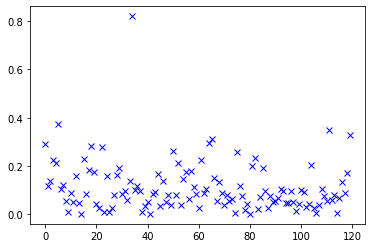

In [109]:
ar_data = ex1.to_numpy(dtype=float)

interaction = network(ar_data)

l=[]
for i in range(len(interaction)-1):
    for j in range(i+1, len(interaction)):
        l.append(abs(interaction[i,j]))


plt.plot(l,'bx')
plt.show()

In [120]:
nodes = [i for i in range(16)]

edges=[]
for i in range(len(interaction)-1):
    for j in range(i+1, len(interaction)):
        if abs(interaction[i,j])>=0.2:
            edges.append((i,j))

G=nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [121]:
G.degree()

DegreeView({0: 4, 1: 4, 2: 2, 3: 2, 4: 3, 5: 3, 6: 4, 7: 1, 8: 1, 9: 2, 10: 0, 11: 1, 12: 2, 13: 1, 14: 3, 15: 3})

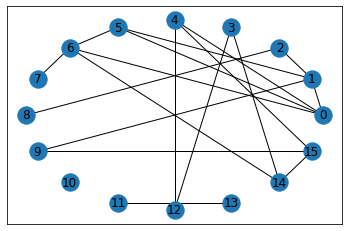

In [122]:
nx.draw_networkx(G,pos=nx.circular_layout(G))

In [102]:
len(edges)

0

In [87]:
ex2 = final.drop(['Healthy life expectancy at birth', 'GDP per capita', 
                   'Inequality in life expectancy',
                  'Inequality in education', 'Inequality in income', 
                  'Adolescent birth rate', 
                  'International student mobility', 'International inbound tourists', 
                  'Share of seats in parliament', 
                  'Mortality rate-Under five',
                  'GDP per capita','Exports and imports',' Urban' ],axis=1)

In [88]:
ex2.replace('..',value=None,method='ffill',inplace=True)
ex2.replace('....',value=None,method='ffill',inplace=True)

Life expectancy at birth                             None
Expected years of schooling                          None
Mean years of schooling                              None
Gross national income (GNI) per capita               None
Gini Coefficient                                     None
Population                                           None
Median age                                           None
Total fertility rate                                 None
Dependency ratio                                     None
Current health expenditure                           None
Population with at least some secondary education    None
Government expenditure on education                  None
Total GDP                                            None
Consumer price index                                 None
Labour force participation rate                      None
Total unemploymnet(% of labour force)                None
High-skill to low-skill ratio                        None
Refugees by co

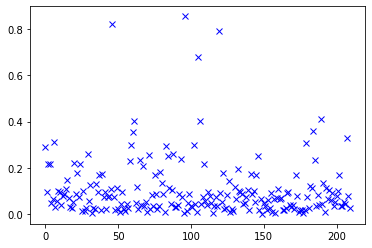

In [89]:
ar_data = ex2.to_numpy(dtype=float)

interaction = network(ar_data)

l=[]
for i in range(len(interaction)-1):
    for j in range(i+1, len(interaction)):
        l.append(abs(interaction[i,j]))


plt.plot(l,'bx')
plt.show()

In [90]:
ex2.columns.values

array(['Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling',
       'Gross national income (GNI) per capita', 'Gini Coefficient',
       'Population', 'Median age', 'Total fertility rate',
       'Dependency ratio', 'Current health expenditure',
       'Population with at least some secondary education',
       'Government expenditure on education', 'Total GDP',
       'Consumer price index', 'Labour force participation rate',
       'Total unemploymnet(% of labour force)',
       'High-skill to low-skill ratio', 'Refugees by country of origin ',
       'Prison population', 'Homicide rate',
       'Foreign direct investment, net inflows'], dtype=object)

In [93]:
ex3 = final.drop(['Healthy life expectancy at birth', 'GDP per capita', 
                  'Inequality in life expectancy',
                  'Inequality in education', 'Inequality in income', 
                  'Adolescent birth rate', 
                  'International student mobility', 'International inbound tourists', 
                  'Share of seats in parliament', 
                  'Mortality rate-Under five',
                  'GDP per capita','Exports and imports',' Urban','Population',
                  'Median age', 'Total fertility rate','Population with at least some secondary education',
                  'Labour force participation rate',
                  'Total unemploymnet(% of labour force)','Homicide rate',
                  'Foreign direct investment, net inflows','Refugees by country of origin ','Total GDP','Expected years of schooling'],axis=1)
ex3.replace('..',value=None,method='ffill',inplace=True)
ex3.replace('....',value=None,method='ffill',inplace=True)

Life expectancy at birth                  None
Mean years of schooling                   None
Gross national income (GNI) per capita    None
Gini Coefficient                          None
Dependency ratio                          None
Current health expenditure                None
Government expenditure on education       None
Consumer price index                      None
High-skill to low-skill ratio             None
Prison population                         None
dtype: object

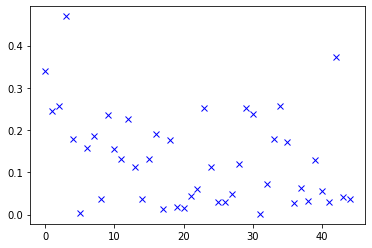

In [94]:
ar_data = ex3.to_numpy(dtype=float)

interaction = network(ar_data)

l=[]
for i in range(len(interaction)-1):
    for j in range(i+1, len(interaction)):
        l.append(abs(interaction[i,j]))


plt.plot(l,'bx')
plt.show()

In [123]:
final.replace('..',value=None,method='ffill',inplace=True)
final.replace('....',value=None,method='ffill',inplace=True)



Life expectancy at birth                             None
Expected years of schooling                          None
Mean years of schooling                              None
Gross national income (GNI) per capita               None
Inequality in life expectancy                        None
Inequality in education                              None
Inequality in income                                 None
Gini Coefficient                                     None
Adolescent birth rate                                None
Share of seats in parliament                         None
Population                                           None
 Urban                                               None
Median age                                           None
Total fertility rate                                 None
Dependency ratio                                     None
Mortality rate-Under five                            None
Healthy life expectancy at birth                     None
Current health

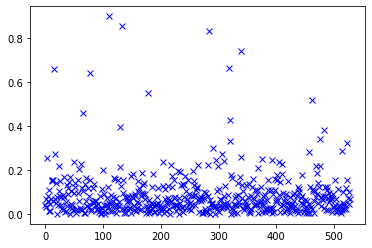

In [124]:
ar_data = final.to_numpy(dtype=float)

interaction = network(ar_data)

l=[]
for i in range(len(interaction)-1):
    for j in range(i+1, len(interaction)):
        l.append(abs(interaction[i,j]))


plt.plot(l,'bx')
plt.show()

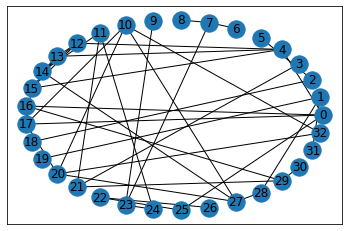

In [125]:
nodes = [i for i in range(33)]

edges=[]
for i in range(len(interaction)-1):
    for j in range(i+1, len(interaction)):
        if abs(interaction[i,j])>=0.2:
            edges.append((i,j))

G=nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw_networkx(G,pos=nx.circular_layout(G))

# Methods and algorithms testing

In [131]:
def network(arr):
    xbar = arr.mean(axis=0)
    l=[]
    
    for i in range(len(arr)):
        l.append(np.outer((arr[i]-xbar),(arr[i]-xbar)))
    
    C=sum(l)/len(l)  #approximation of the covariance matrix
    C_inv = np.linalg.inv(C)  #its inverse
    
    interaction = np.array([[0]*len(C_inv)]*len(C_inv),dtype=float) #setting up the network matrix 
    
    for i in range(len(C_inv)):
        for j in range(len(C_inv)):
            if i == j:
                interaction[i,j]=1
            else:
                interaction[i,j]= (-(C_inv[i,j])/(math.sqrt(C_inv[i,i]*C_inv[j,j])))
    
    return interaction

In [132]:
'''Using synthetic data to check the method above for appoximating the interaction network and lagrange multipliers
and experimentaly test the amount of samples needed to get a good approximation'''
'''This fuction constructs a random network of given size n and gives us the mean vector and covariance matrix 
in order to create synthetic dataset'''
def random_network(n):
    C=datasets.make_spd_matrix(n) # getting a positive definite matrix for the gaussian distributioun 
    x=np.random.rand(n)
    C_inv = np.linalg.inv(C)

    interaction = np.array([[0]*len(C_inv)]*len(C_inv),dtype=float) #setting up the network matrix 
    
    for i in range(len(C_inv)):
        for j in range(len(C_inv)):
            if i == j:
                interaction[i,j]=1
            else:
                interaction[i,j]= (-(C_inv[i,j])/(math.sqrt(C_inv[i,i]*C_inv[j,j])))
    return [x,C,interaction]

In [133]:
def plot_check(a,b):
    a1=[]
    b1=[]
    for i in range(len(a)-1):
        for j in range(i+1,len(a)):
            a1.append(a[i,j])
            b1.append(b[i,j])
    x = np.linspace(-1,1)
    y = [i for i in x]
    plt.plot(a1,b1,'r.')
    plt.plot(x,y)
    plt.show()

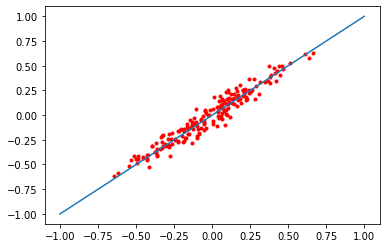

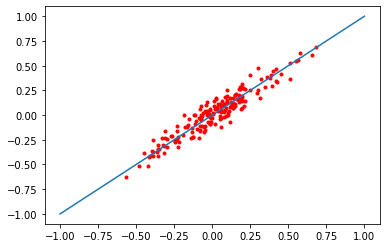

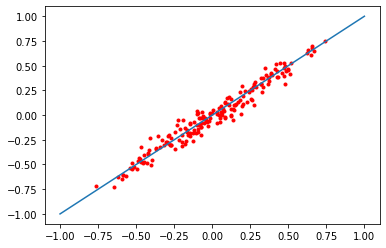

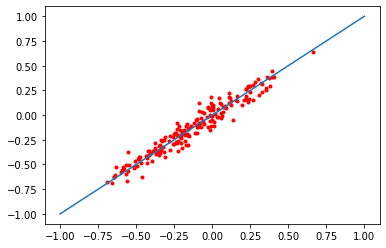

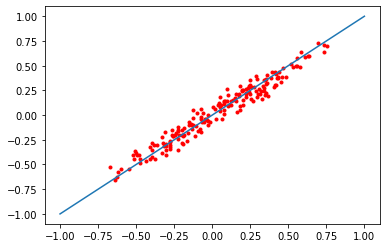

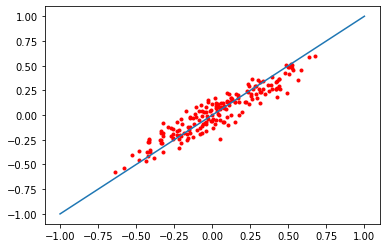

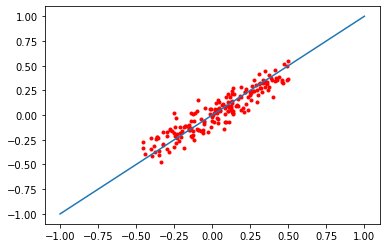

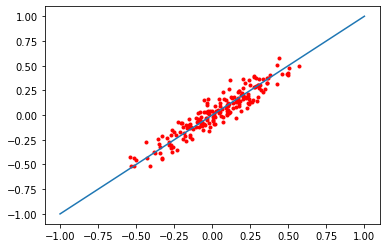

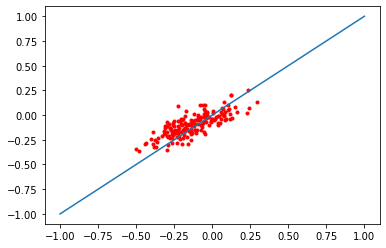

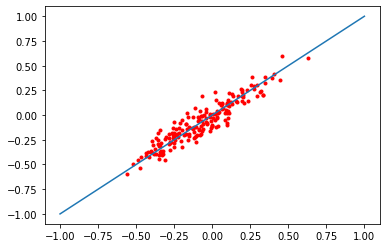

In [134]:
for i in range(10):
    l = random_network(20)
    x= l[0]
    C=l[1]
    interaction = l[2]
    syn_set = np.random.multivariate_normal(x,C,150)
    approx = network(syn_set)
    plot_check(approx,interaction)

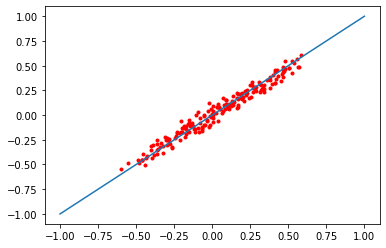

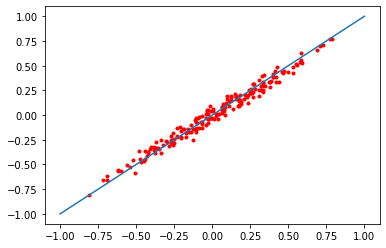

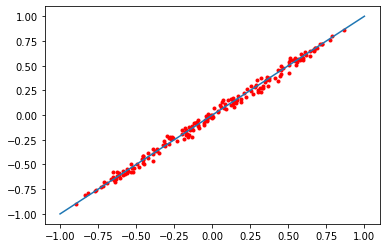

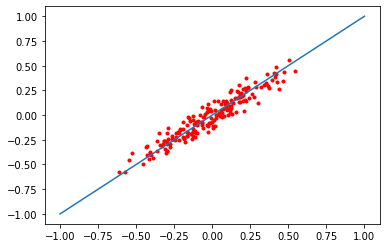

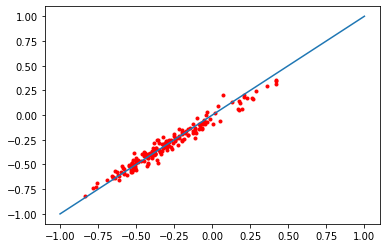

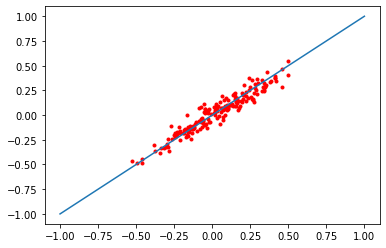

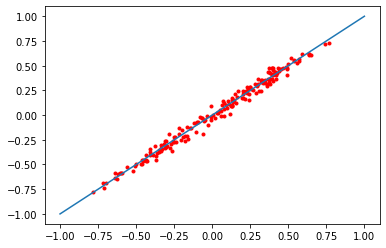

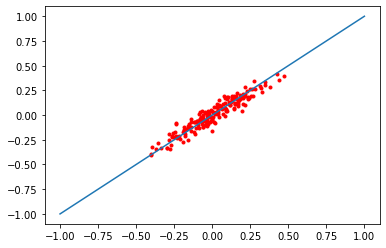

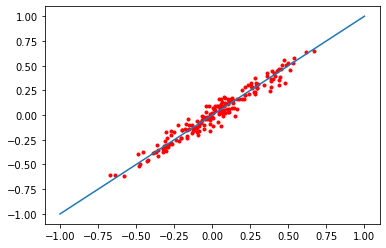

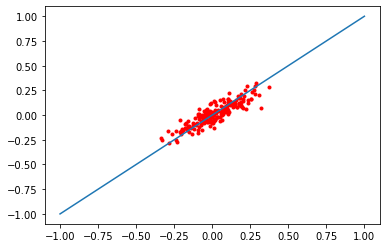

In [135]:
for i in range(10):
    l = random_network(20)
    x= l[0]
    C=l[1]
    interaction = l[2]
    syn_set = np.random.multivariate_normal(x,C,300)
    approx = network(syn_set)
    plot_check(approx,interaction)